## Activitat 1: Oxigen (Z = 8)

En aquesta activitat, determinareu els valors dels termes de volum i asimetria del Model de Gota Líquida basant-vos en les dades experimentals dels isòtops d’oxigen.

A sota les gràfiques, hi trobareu els paràmetres de la fórmula del ***Model de Gota Líquida (MGL)***. Al costat d'aquests paràmetres es mostra la taula que conté l'energia d'enllaç per nucleó mesurada experimentalment. També us mostrem la mateixa quantitat (l'energia d'enllaç dividida per $A$, el nombre total de neutrons i protons)  calculada teòricament amb el model per a tots els isòtops d'oxigen observats (nombre de protons $Z=8$). Totes les energies es donen en unitats de kilo-electrons-volts [keV].

A la ***Gràfica 1*** hi mostrem l'energia d'enllaç per nucleó mesurada experimentalment, i la calculada teòricament per a tots els isòtops d'oxigen observats (dades de l'arxiu *mass1_mas20.txt*, extret de https://www-nds.iaea.org/amdc/). La ***Gràfica 2*** mostra la diferència entre les energies d’enllaç experimentals i teòriqiues (última columna de la taula inferior), utilitzant els paràmetres del MGL.

El vostre objectiu és canviar els paràmetres del ***MGL*** de manera que les diferències en valors experimentals i teòrics siguin el més a prop possible de zero. D'això se'n diu optimitzar els paràmetres. Seguiu llegint per esbrinar com.

PS: Podeu visitar el vídeo del Dr. Arnau Rios (https://youtu.be/Qsu7IrGiOIk) sobre aquest tema per obtenir més informació sobre cada paràmetre.

In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

%matplotlib nbagg

In [2]:
def extract(x):
    global extract_n
    extract_n = df.loc[df['Element'] == x]
    return

def update_plot(element, av, aS, ac, aA, ap, checkbox):
    global y, df
    '''
    this function is linked to the slider and
    it replots the binding energy by nucleon when the slider are changed
    '''
    df = pd.read_fwf('https://raw.githubusercontent.com/arnaurios/Divulgacio_Outreach/main/mass_1.mas20.txt',    
                 usecols=(2, 3, 4, 6, 11),
                 names=['N', 'Z', 'A', 'Element', 'Experimental'],
                 widths=(1,3,5,5,5,1,3,4,1,14,12,13,1,10,1,2,13,11,1,3,1,13,12,1),
                 header=28, 
                 index_col=False)

    df['Experimental'] = pd.to_numeric(df.Experimental.str.replace('#',''))
    extract(element)
    
    axes[0].clear()
    axes[1].clear()
    Z = extract_n.Z
    A = extract_n.A
    y = (av*A-aS*pow(A,2/3)-ac*pow(Z,2)*pow(A,-1/3)-aA*pow((A-2*Z),2)/A +((A % 2)==0) * ap/np.sqrt(A))*1000/A
    y = y.to_frame()
    y = y.rename(columns = {0:'Teòrica'})
    
    df = pd.concat([extract_n, y], axis=1)
    df['Diferència'] = (df.Experimental - df.Teòrica)  
    df.reset_index(drop=True, inplace=True)    
    del df['Element']
    
    axes[0].plot(A, y, label='Teòrica')
    extract_n.plot(x='A',y='Experimental', ax=axes[0], marker='o')
    axes[0].legend(loc=4)
    axes[0].set_xlabel('Nombre de massa (A)')
    axes[0].set_ylabel('$Energia \ d\'enllaç \ BE/A$ (keV)')
    
    df.plot(x='A', 
            y='Diferència', 
            ax=axes[1], 
            xlabel='Nombre de massa (A)', 
            ylabel='$Diferència \ en \ l\'Energia \ d\'enllaç \ \Delta BE/A$ (keV)')
    
    axes[0].grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    axes[1].grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.show()
    plt.tight_layout()
    out = widgets.Output()
    with out:
        display(df)
    grid[0, 1]  = out
    return

<IPython.core.display.Javascript object>


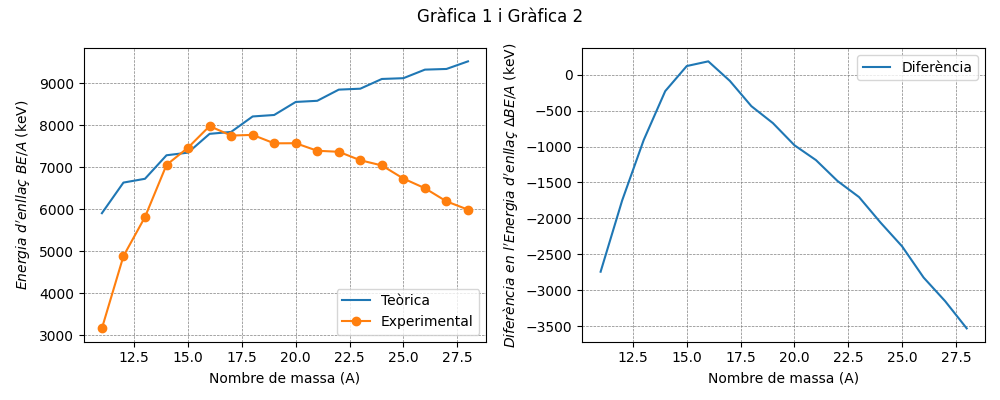

GridspecLayout(children=(interactive(children=(Text(value='O', description='Element:', placeholder="Nom de l'e…

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2,  figsize=(10,4))
plt.suptitle('Gràfica 1 i Gràfica 2')
style = {'description_width': '200px'}
layout = widgets.Layout(width='300px') 

element = widgets.Text(
          value='O',
          placeholder='Nom de l\'element',
          description='Element:',
          disabled=False
          )

av = widgets.BoundedFloatText(value=16, 
                              min=0, 
                              max=20, 
                              step=0.1, 
                              description='$a_V$, Volum:', 
                              disabled=False,
                              style=style,
                              layout=layout)

aS = widgets.BoundedFloatText(value=18.3, 
                              min=0, 
                              max=20, 
                              step=0.1, 
                              description='$a_S$, Superfície:', 
                              disabled=True,
                              style=style,
                              layout=layout)

ac = widgets.BoundedFloatText(value=0.714, 
                              min=0, 
                              max=20, 
                              step=0.1, 
                              description='$a_C$, Coulomb:', 
                              disabled=True,
                              style=style,
                              layout=layout)

aA = widgets.BoundedFloatText(value=23, 
                              min=0, 
                              max=50, 
                              step=0.1, 
                              description='$a_A$, Asimetria:', 
                              disabled=False,
                              style=style,
                              layout=layout)

ap = widgets.BoundedFloatText(value=12, 
                              min=0, 
                              max=20, 
                              step=0.1, 
                              description='$a_P$, Aparellament:', 
                              disabled=True,
                              style=style,
                              layout=layout)

checkbox = widgets.Checkbox(
                            value=False,
                            description='Bloqueja / Desbloqueja Parametres',
                            disabled=False,
                            indent=False
                            )

link1 = widgets.link((aS, 'disabled'), (checkbox, 'value'))
link2 = widgets.link((ac, 'disabled'), (checkbox, 'value'))
link3 = widgets.link((ap, 'disabled'), (checkbox, 'value'))

grid = widgets.GridspecLayout(1, 2, height='auto')
grid[0, 0] = widgets.interactive(update_plot, element=element, av=av, aS=aS, ac=ac, aA=aA, ap=ap, checkbox=checkbox)

grid

En aquesta primera part de l’activitat, utilitzem dades de l’energia d'enllaç els als isòtops d’oxigen per optimitzar els parametres del MGL, i per investigar l’efecte del terme d'aparellament en particular. Un cop acabada l'activitat, apunteu-vos els paràmetres optimitzats que heu trobat, ja que els necessitareu per a les activitats següents, així com per al qüestionari final.

* Les tasques es mostren a continuació en *cursiva*.  
* Les respostes a les preguntes amb una (<font color='red'>Q</font>) al costat es demanen al qüestionari de l'activitat (el pots trobar a https://forms.office.com/r/rDDD2RRTik).

#### Activitat 1a

L’oxigen-16 $(A = 16)$ té $8$ protons i $8$ neutrons. Quan un isòtop té el mateix nombre de protons i neutrons, diem que és simètric en $Z$ i $N$. Això significa que el terme d’asimetria $(a_A)$ no té cap efecte sobre l’energia d’enllaç. Les dades d’oxigen-16 es troben a la taula anterior a la fila amb $N=8$.

*Proveu de canviar la constant del terme d’asimetria $(a_A)$ i convenceu-vos que l’energia d'enllaç (Teòrica) calculada per a l’oxigen-16 no depèn del terme d’asimetria. Tingueu en compte que el canvi de constant modificarà les energies d'enllaç de tots els altres isòtops.*

#### Activitat 1b

(<font color='red'>Q</font>) Atès que el terme d’asimetria no afecta l’energia d’enllaç calculada per a l’oxigen-16, podeu posar-lo a zero per ara i utilitzar les dades experimentals de l’oxigen-16 per determinar el terme de volum $(a_V)$.

*Comenceu posant $a_A = 0$. Trobeu un bon valor per a la constant del terme de volum, $a_V$. Per això, cal que modifiqueu la constant $a_V$ fins que la diferència entre el model (Teòric) i les dades mesurades (Experimentals) de l’oxigen-16 (fila $N=8$) a la taula siguin molt a prop de zero. Un rang raonable per començar és entre $a_V=10$ i $20$ MeV. La vostra resposta final per a la constant del terme de volum $a_V$ ha de tenir una precisió de com a mínim $0.1$ MeV.*

#### Activitat 1c

(<font color='red'>Q</font>) Ara que ja sabeu quin és el terme de volum, podeu passar a determinar el terme d’asimetria $a_A$ en funció de la forma de la corba d’energia d'enllaç a través de tots els isòtops d’oxigen que es mostren a les gràfiques.

*Trobeu un bon valor per al terme de constant d’asimetria: podeu fer-ho variant la constant $a_A$ fins que la forma de la corba d’energia d'enllaç teòrica coincideixi amb les dades experimentals de la ***Gràfica 1***. Això també hauria de minimitzar la diferència representada a la ***Gràfica 2*** (és a dir, a la ***Gràfica 2*** la línia hauria de ser propera a zero). Us suggerim que comenceu explorant què passa quan canvieu el paràmetre d’asimetria en passos de $10$ MeV des de $-30$ fins a $30$ MeV. Tingueu en compte que no podreu obtenir un coincidència perfecta. Aquesta incertesa es pot utilitzar per obtenir una incertesa sobre el propi terme d'asimetria. La resposta final per la constant del terme d'asimetria $a_A$ ha de tenir una precisió aproximada de $1$ MeV.*

#### Activitat 1d

Ara que heu determinat tant el terme de volum $a_V$ com el terme d’asimetria $a_A$ del MGL, podem investigar l’efecte del terme d'aparellament.

*Si manteniu el terme de volum $a_V$ i el de asimetria $a_A$ en els paràmetres optimitzats (les respostes que heu trobat als apartats 1b i 1c), poseu el terme d'emparellament a zero. A la ***Gràfica 2***, hi veureu un efecte sorprenent en funció de si hi ha un nombre senar o parell de neutrons a l’isòtop de l’oxigen amb masses de $13$ a $17$. Aquest és l’efecte del terme d’emparellament que us hem explicat. Quina és l’escala de les diferències que veieu a la  ***Gràfica 2*** en keV? Com es compara això amb l'energia d'enllaç total per nucleó en keV de la ***Gràfica 1***? [Nota: no cal que registreu les respostes a aquesta pregunta]*

#### Activitat EXTRA
Aquesta activitat es pot adaptar per a altres elements de la Taula Periòdica. Per fer-ho, només s'ha d'entrar el símbol de l'element que es vulgui estudiar a la capsa ***Element***. Us animeu a canviar l'element i fer noves preguntes més enllà d'aquesta activitat?


##### Bravo per haver completar aquesta activitat! Ara aneu a la següent activitat [Activitat 2 del Model de Gota Líquida, Prediccions del model](./MGL2_Prediccio.ipynb).

In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')